In [27]:
import pandas as pd
import matplotlib.pyplot as plt

#### 0、加载数据

In [2]:
air_quality = pd.read_csv("../data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc":"datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [4]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

#### 1、转化为时间对象

·使用.to_datetime()方法将时间字符串转化为 pandas时间对象<br>
·时间对象可以发方便的进行 时间操作，例如：最值计算、差值计算、数值抽取

In [12]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

In [7]:
air_quality["datetime"].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [8]:
air_quality["datetime"].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

In [9]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

基于.dt接口进行 数据抽取[例如月份、星期等]

In [16]:
air_quality["weekday"] = air_quality["datetime"].dt.weekday

In [17]:
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3


根据是星期几进行分类汇总

In [15]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])

In [22]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

时间相关的图表输出

Text(0, 0.5, '$NO_2 (µg/m^3)$')

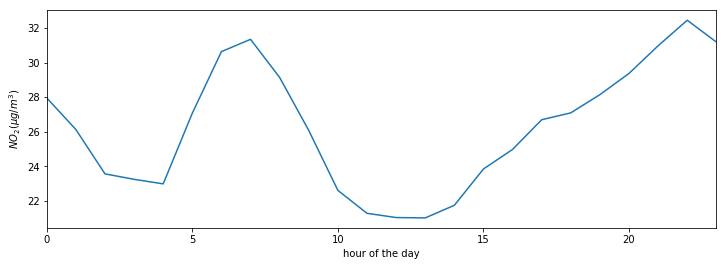

In [33]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot()
plt.xlabel("hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$")

Text(0, 0.5, '$NO_2 (µg/m^3)$')

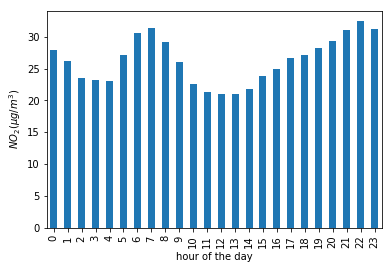

In [34]:
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind="bar")
plt.xlabel("hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$")

将时间作为索引<br>
之后可以直接计算索引抽取数据，而不用调用dt属性<br>

In [35]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [36]:
no_2.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='datetime', length=1033)

In [37]:
no_2.index.weekday

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
           dtype='int64', name='datetime', length=1033)

i:\anaconda64\road\envs\heroes\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


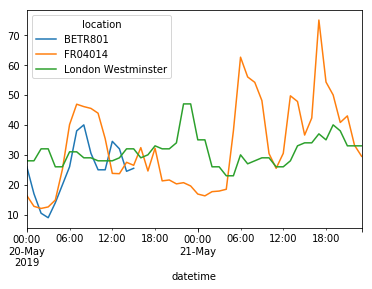

In [39]:
no_2["2019-05-20":"2019-05-21"].plot()

对时间索引重采样<br>
·resample函数类似于 groupby函数，通过传入一个字符参数来指定目标频率，这个参数<br>
  可以是"M","5H"等<br>
·采用后，需要指定一个聚合函数，例如 mean、max等<br>

In [42]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


In [43]:
monthly_max.index.freq  # 求频率

<MonthEnd>

i:\anaconda64\road\envs\heroes\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


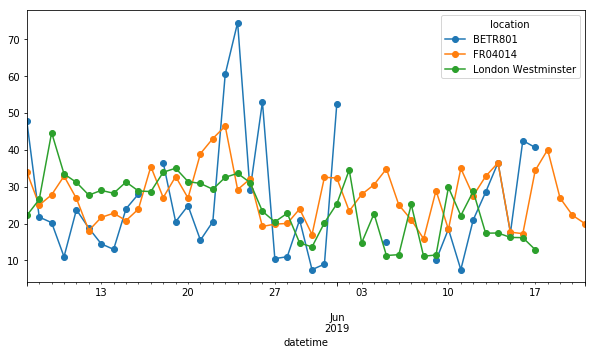

In [44]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))